In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import gymnasium
from gym import spaces

# Wrapper
Here we implement a wrapper for diogonla movments.

In [10]:
import gym

class DiagonalTaxiWrapper(gym.Wrapper):
    """
    A wrapper class for the Taxi-v3 environment that allows diagonal movement.
    """
    
    def __init__(self, env):
        super().__init__(env)
         
        # Modify the action space here
        self.action_space = spaces.Discrete(10)  # Restrict to three actions
    
        
    def step(self, action):
        # Convert the action to a tuple of (delta_x, delta_y).
        if action == 0 or action == 1 or action ==2 or action == 3 or action == 4 or action == 5:
            act = self.env.step(action)
            return act
        elif action == 6:
            action0 = 0
            action1 = 2
           
            act = self.env.step(action0)
            act = self.env.step(action1)
            return act 

            
        elif action == 7:
             # Move diagonally top-right.
            action0 = 1
            action1 = 2
           
            act = self.env.step(action0)
            act = self.env.step(action1)
            return act 

            action = 1
        elif action == 8 :
            dx , dy = (-1 , 0 ) # Move diagonally bottom-left
            action0 = 0
            action1 = 3
           
            act = self.env.step(action0)
            act = self.env.step(action1)
            return act 


        elif action == 9 :        # Move diagonally top-left
            action0 = 1
            action1 = 2
           
            act = self.env.step(action0)
            act = self.env.step(action1)
            return act 

        else:
            raise ValueError(f"Invalid action: {action}")
        
#         # Compute the new position after taking the action.
#         print(self.env.s)
#         old_pos = list(self.env.decode(self.env.s) )
#         print(old_pos)
#         new_pos = [old_pos[0] + dx, old_pos[1] + dy]
#         target_pos = [old_pos[0] + tdx, old_pos[1] + tdy]
        

#         # Check if the new position is valid or not.
#         if target_pos[0] < 0 or target_pos[0] >= self.env.desc.shape[0] or target_pos[1] < 0 or target_pos[1] >= self.env.desc.shape[1]:
#             reward = -1.0  # Invalid move penalty.
#             done = False
#             info = {}
#             act = []
#             act.append(self.env.s)
#             act.append(reward)
#             act.append(done)
#             act.append(info) 
#             return act
#         print(action)
#         # Compute the new state after taking the action.
#         new_state = self.env.encode(*new_pos, old_pos[2], old_pos[3])
#         self.env.s = new_state
#         # Execute the action in the underlying environment.
#         act =  self.env.step(action)
        
#         return act
    
    def action(self, action):
        # Perform any additional processing on the action here
        return action


![title](Pictures/p3.png)

![title](Pictures/p4.png)
The algorithm is here :

![title](Pictures/p5.png)

Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episode 89
Episode 90
Episode 9

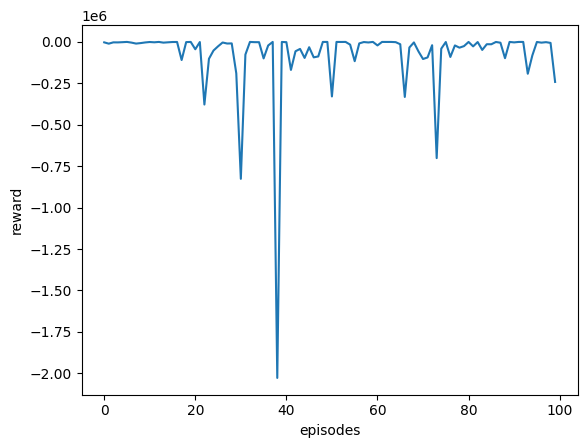

In [11]:
env = gym.make('Taxi-v3')
env = DiagonalTaxiWrapper(env)
# we create a table with  observation_space x  action_space
q_table = np.zeros([env.observation_space.n , env.action_space.n])
# we train our model for 1000 episodes
training_episodes = 100
# here we define aggregating_rewards variable and then we illustrare it
index = [i for i in range(100)]
aggregating_rewards=[]
#  in this case we use epsilon greedy and we assign 0.15 as exploratin and 0.85 for choosing the maximum q
epsilon = 0.15
discount_factor = 0.01

for i in range(training_episodes) :
    
    state = env.reset()[0]
    done = False
    agregate_reward = 1
#     First we have ti choose an action by epsilon-greedy 
    if random.uniform(0 ,1 ) < epsilon :
            
            action = env.action_space.sample()
            
    else : 
            
            action = np.argmax(q_table[state])
            
# .......................................................
#  in the loop below we itrate the episode ..............

    while not done :
        
        
#  we perform the action and recive R and go to the s prime    

        act = env.step(action)
#         act[0] ->next_state
#         act[1] ->reward
#         act[2] ->done


        if random.uniform(0 ,1 ) < epsilon :
            
            action_prime = env.action_space.sample()
            
        else : 
            
            action_prime = np.argmax(q_table[state])
            
        agregate_reward +=  act[1]
        q_table[state , action] = q_table[state , action]  + (act[1] + discount_factor*q_table[act[0] , action_prime]  - q_table[state , action]) 
        state = act[0]
        action = action_prime
        done = act[2]
    
    aggregating_rewards.append(agregate_reward)       
    print(f"Episode {i}")
    


plt.plot(index, aggregating_rewards)
plt.xlabel("episodes")
plt.ylabel("reward")
plt.show()
        

 